In [13]:
import matplotlib.pyplot as plt
import numpy as np

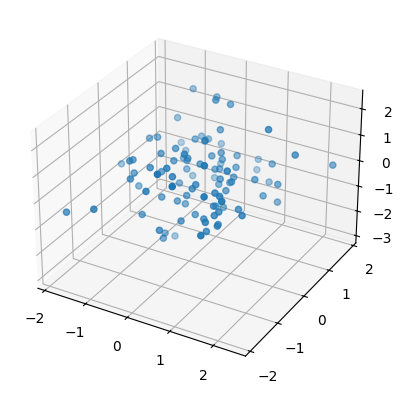

In [14]:
# Create some normally distributed points

n = 100
x = np.random.randn(n)
y = np.random.randn(n)
z = np.random.randn(n)
norm_xyz = np.stack((x, y, z))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(norm_xyz[0], norm_xyz[1], norm_xyz[2])
plt.show()

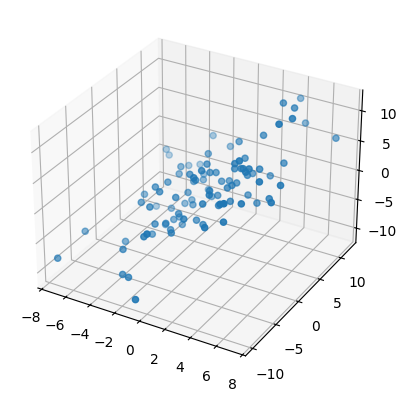

In [15]:
# Scale the points by a covariance transform

transform = np.array([
    [1, 3, 0.5],
    [3, 2, 3],
    [0.5, 3, 4]
])
xyz = transform @ norm_xyz

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(xyz[0], xyz[1], xyz[2])
plt.show()

In [16]:
# Lets calculate the covariance matrix of the data
#  - We need var(x), var(y), var(z), cov(x, y), cov(x, z), and cov(y, z)

mean_xyz = np.mean(xyz, axis=1)

delta_x = xyz[0] - mean_xyz[0]
delta_y = xyz[1] - mean_xyz[1]
delta_z = xyz[2] - mean_xyz[2]

var_x = np.sum(delta_x**2) / (n - 1)
var_y = np.sum(delta_y**2) / (n - 1)
var_z = np.sum(delta_z**2) / (n - 1)
cov_xy = np.sum(delta_x * delta_y) / (n - 1)
cov_xz = np.sum(delta_x * delta_z) / (n - 1)
cov_yz = np.sum(delta_y * delta_z) / (n - 1)

cov = np.array([
    [var_x , cov_xy, cov_xz],
    [cov_xy, var_y , cov_yz],
    [cov_xz, cov_yz, var_z ]
])
print(cov)

# Check our results against numpy's cov()
print("Covariance matrix correct? ->", np.allclose(cov, np.cov(xyz)))

[[ 7.67741669  7.13181356  8.13441249]
 [ 7.13181356 17.15365621 15.65861968]
 [ 8.13441249 15.65861968 20.02670063]]
Covariance matrix correct? -> True


PC1: [0.33447522 0.63370863 0.69752397] 	 Variance: 38.1533347850855
PC2: [ 0.92405056 -0.36589798 -0.11067621] 	 Variance: 3.8791373774657507
PC3: [-0.18508614 -0.68156587  0.70796263] 	 Variance: 2.8253013665250926
Dot products: 5.551115123125783e-16 -5.551115123125783e-17 1.5543122344752192e-15


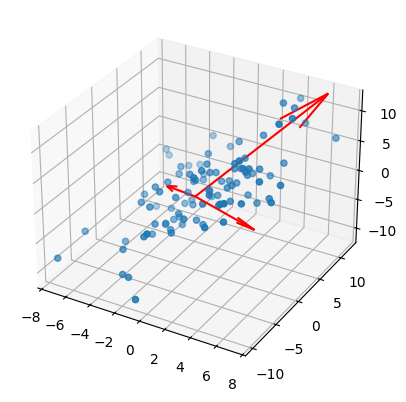

Eigenvalues correct? -> True
Eigenvectors correct? -> True


In [21]:
# Lets find the eigenvalues and eigenvectors of the covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov) # QR decomposition algorithm
eig_pairs = [(eig_val, eig_vec) for eig_val, eig_vec in zip(eig_vals, eig_vecs.T)]
eig_pairs = sorted(eig_pairs, key=lambda e: e[0], reverse=True)

pc1, var1 = eig_pairs[0][1], eig_pairs[0][0]
pc2, var2 = eig_pairs[1][1], eig_pairs[1][0]
pc3, var3 = eig_pairs[2][1], eig_pairs[2][0]

scale = 3 # number of standard deviations
scaled_pc1 = scale * np.sqrt(var1) * pc1
scaled_pc2 = scale * np.sqrt(var2) * pc2
scaled_pc3 = scale * np.sqrt(var3) * pc3

print("PC1:", pc1, "\t Variance:", var1)
print("PC2:", pc2, "\t Variance:", var2)
print("PC3:", pc3, "\t Variance:", var3)
print("Dot products:", np.dot(pc1, pc2), np.dot(pc1, pc3), np.dot(pc2, pc3)) # eigenvectors should be orthogonal

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(xyz[0], xyz[1], xyz[2])
origin = [0, 0, 0]
plt.quiver(*origin, *scaled_pc1, color='r')
plt.quiver(*origin, *scaled_pc2, color='r')
plt.quiver(*origin, *scaled_pc3, color='r')
plt.show()

# Check our results against scikit-learn's PCA()
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(xyz.T)
print("Eigenvalues correct? ->", np.allclose([var1, var2, var3], pca.explained_variance_)) # eigenvalues
print("Eigenvectors correct? ->", np.allclose(np.array([pc1, pc2, pc3]), pca.components_)) # eigenvectors

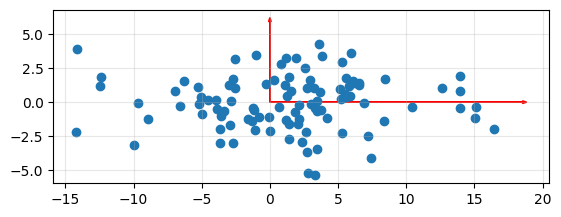

In [18]:
# Finally, lets project the data onto our principal components (eigenvectors)

p_xy = np.array([pc1, pc2]) @ xyz # rotate onto the eigenbasis

p_scale = 3 # number of standard deviations
p_scaled_pc1 = p_scale * np.sqrt(var1) * np.array([1, 0])
p_scaled_pc2 = p_scale * np.sqrt(var2) * np.array([0, 1])

plt.arrow(0, 0, p_scaled_pc1[0], p_scaled_pc1[1], head_width=0.2, head_length=0.3, color='r')
plt.arrow(0, 0, p_scaled_pc2[0], p_scaled_pc2[1], head_width=0.2, head_length=0.3, color='r')
plt.scatter(p_xy[0], p_xy[1])
ax = plt.gca()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')
plt.show()